In [1]:
%load_ext autoreload
%autoreload 2





import pickle


In [2]:
from main import tools, ode, optimize, net, get_data, model
import gpytorch

/home/yf297/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [5]:
with open('hrrr/datas/datas_fit.pkl', 'rb') as f:
    datas = pickle.load(f)

In [6]:
len(datas)

36

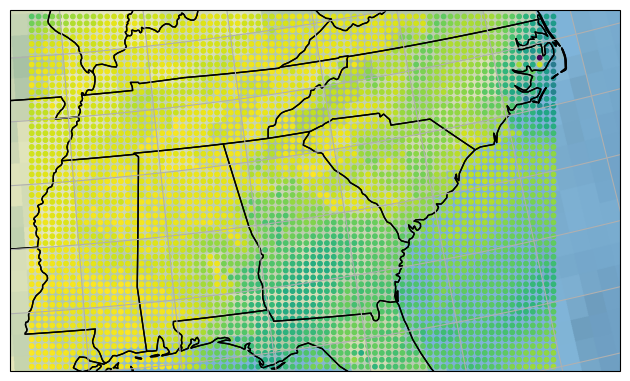

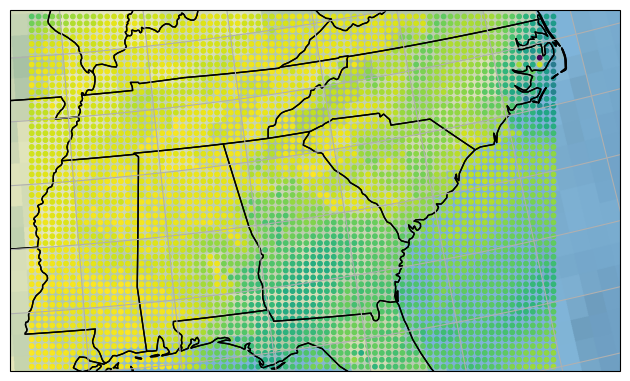

In [7]:
datas[0].plot_observations(datas[0].indices)

In [26]:
import torch
indices = torch.randperm(datas[0].m)


In [29]:
datas[0].level

'500 mb'

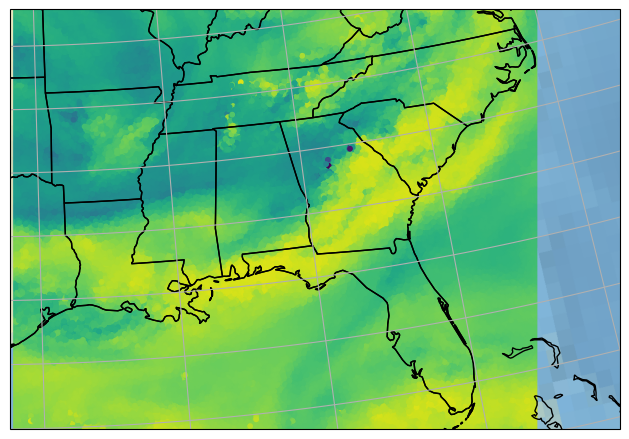

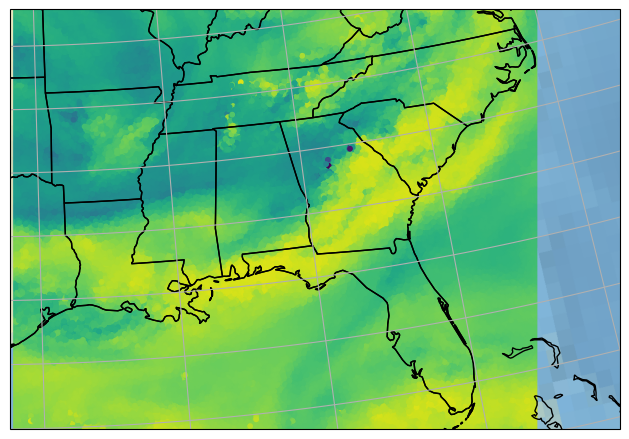

In [33]:
datas[0].plot_observations(indices, frame = 6)

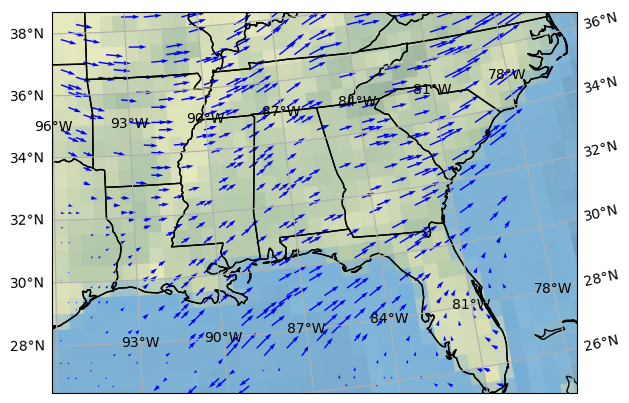

In [42]:
f = datas[2].plot_vel(indices, color = "blue", frame = 6)

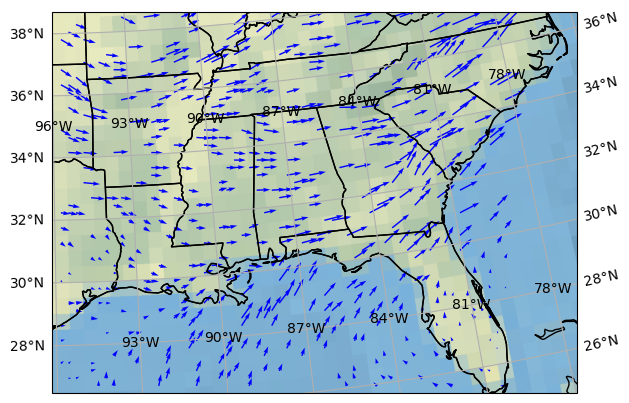

In [43]:
f = datas[2].plot_vel_data(indices, color = "blue")

In [18]:
datas[4].date

'2024-08-18'

In [29]:
datas[0].T

tensor([0.0000, 0.0417, 0.0833, 0.1250, 0.1667, 0.2083, 0.2500])

In [8]:
import gc
gc.collect()


0

In [9]:
import torch
torch.cuda.empty_cache()